In [1]:
# %load kmeans.py
## Initialisation
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

colmap = {1: 'r', 2: 'g', 3: 'b', 4: 'c', 5: 'm', 6: 'y'}
df = pd.read_csv('data_noah.csv', usecols=['x', 'y'])
df['color'] = np.full((len(df), 1), 'k')

plotx_min = min(df['x']) - 1
plotx_max = max(df['x']) + 1
ploty_min = min(df['y']) - 1
ploty_max = max(df['y']) + 1

In [2]:
def draw_plot():
    plt.figure(figsize=(5, 5))
    plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i], color=colmap[i])
    plt.xlim(plotx_min, plotx_max)
    plt.ylim(ploty_min, ploty_max)
    plt.show()

In [3]:
## Assignment Stage
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0]) ** 2
             + (df['y'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [4]:
## Update Stage
def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest'] == i]['x'])
        centroids[i][1] = np.mean(df[df['closest'] == i]['y'])
    return k

In [5]:
# draw update arrows
# fig = plt.figure(figsize=(5, 5))
# plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
# for i in centroids.keys():
#     plt.scatter(*centroids[i], color=colmap[i])
# plt.xlim(plotx_min, plotx_max)
# plt.ylim(ploty_min, ploty_max)

# ax = plt.axes()
# for i in old_centroids.keys():
#     old_x = old_centroids[i][0]
#     old_y = old_centroids[i][1]
#     dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
#     dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
#     ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
# plt.show()

In [6]:
# cost function
def cost_func():
    err = 0;
    for i in range(len(df)):
        j = df['closest'][i]
        err = err + df['distance_from_{}'.format(j)][i]
    return err

[8648.990954687404, 3916.6411570054174, 2810.982687659296, 2423.1691187486595, 2238.984886535861, 2102.2059200134404]


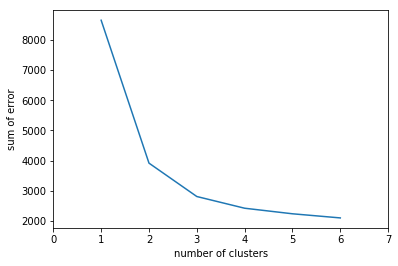

In [7]:
sumerr = [] 
K = 7 # K<=7
for k in range(1, K):
    centroids = { i+1: [df['x'][entry], df['y'][entry]] for i, entry in enumerate(random.sample(range(len(df)), k)) }
#     old_centroids = copy.copy(centroids)
    df = assignment(df, centroids)
    
    while True:
        closest_centroids = df['closest'].copy(deep=True)
        centroids = update(centroids)
        df = assignment(df, centroids)
        if closest_centroids.equals(df['closest']): break
    
#     draw_plot()
    sumerr.append(cost_func())
    
print(sumerr)
plt.plot(list(i for i in range(1, K)), sumerr)
plt.xlabel('number of clusters')
plt.ylabel('sum of error')
plt.xlim(0, K)
plt.show()

In [8]:
from sklearn.metrics import confusion_matrix

pitch = pd.read_csv('data_noah.csv', usecols=['pitch_type'])
x = len(np.unique(pitch))
label = np.append(np.unique(pitch), np.unique(df['color']))
cfmx = pd.DataFrame(confusion_matrix(pitch, df['color']), index=label, columns= label)
cfmx = cfmx.iloc[:x, x:]
print(np.unique(pitch), np.unique(df['color']))

col = {'r': 'red', 'g': 'green', 'b': 'blue', 'c': 'cyan', 'm': 'magenta', 'y': 'yellow'}
def func(s):
    return ['background-color: {}; opacity: 0.6'.format(col[s.name])]*len(s)

cfmx.style.apply(func, axis=0)

['CH' 'CU' 'FF'] ['b' 'c' 'g' 'm' 'r' 'y']


,b,c,g,m,r,y
CH,1,0,35,0,0,126
CU,0,301,0,0,0,0
FF,270,0,212,190,167,19
